In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
import pickle

In [2]:
def convert(imgs, labels, outfile, n):
    imgf = open(imgs, "rb")
    labelf = open(labels, "rb")
    csvf = open(outfile, "w")

    imgf.read(16)
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))]
        for j in range(28*28):
            image.append(ord(imgf.read(1)))
        images.append(image)

    for image in images:
        csvf.write(",".join(str(pix) for pix in image)+"\n")
    imgf.close()
    labelf.close()
    csvf.close()

In [3]:
mnist_train_x = "/home/raj/PycharmProjects/n-rex/mnist/archive/train-images.idx3-ubyte"
mnist_train_y = "/home/raj/PycharmProjects/n-rex/mnist/archive/train-labels.idx1-ubyte"
mnist_test_x  = "/home/raj/PycharmProjects/n-rex/mnist/archive/t10k-images.idx3-ubyte"
mnist_test_y  = "/home/raj/PycharmProjects/n-rex/mnist/archive/t10k-labels.idx1-ubyte"


In [4]:
convert(mnist_train_x, mnist_train_y, "/home/raj/PycharmProjects/n-rex/mnist/train.csv", 60000)
convert(mnist_test_x, mnist_test_y, "/home/raj/PycharmProjects/n-rex/mnist/test.csv", 10000)


In [13]:
train_file = open("/home/raj/PycharmProjects/n-rex/mnist/train.csv", "r")
train_list = train_file.readlines()
train_file.close()
print(len(train_list))


60000


In [14]:
train_list[1000]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,146,254,255,251,95,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,97,234,254,254,232,254,254,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,140,254,254,174,67,33,200,254,190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,253,254,235,51,1,0,0,12,254,253,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,216,254,244,55,0,0,0,0,6,213,254,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,254,254,132,0,0,0,0,0,0,168,254,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,254,243,34,0,0,0,0,0,0,168,254,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,254,157,0,0,0,0,0,0,0,168,254,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,228,254,105,0,0,0,0,0,0,7,228,254,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,254,254,87,0,0,0,0,0,0,10,254,246,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,254,254,9,0

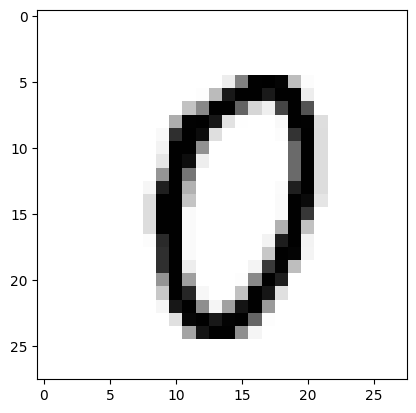

In [15]:
all_values = train_list[1000].split(',')
image_array = np.asarray(all_values[1:], dtype = float).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [16]:
test_file = open("/home/raj/PycharmProjects/n-rex/mnist/test.csv", "r")
test_list = test_file.readlines()
test_file.close()
print(len(test_list))


10000


In [17]:
class DNN:
    def __init__(self, sizes=[784, 128, 64, 10], epochs=10, lr=0.001):
        self.sizes = sizes
        self.epochs = epochs
        self.lr = lr

        input_layer, hidden_1, hidden_2, output_layer = sizes


        self.params = {
            'w1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'w2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'w3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer),
            'b1': np.zeros((hidden_1, 1)),
            'b2': np.zeros((hidden_2, 1)),
            'b3': np.zeros((output_layer, 1))
        }

    def sigmoid(self, x, derivative=False):
        s = 1 / (1 + np.exp(-x))
        return s * (1 - s) if derivative else s

    def softmax(self, x):
        exps = np.exp(x - np.max(x))
        return exps / np.sum(exps, axis=0)

    def forward_pass(self, x_train):
        p = self.params
        p['A0'] = x_train

        p['Z1'] = np.dot(p['w1'], p['A0']) + p['b1']
        p['A1'] = self.sigmoid(p['Z1'])

        p['Z2'] = np.dot(p['w2'], p['A1']) + p['b2']
        p['A2'] = self.sigmoid(p['Z2'])

        p['Z3'] = np.dot(p['w3'], p['A2']) + p['b3']
        p['A3'] = self.softmax(p['Z3'])

        return p['A3']

    def backward_pass(self, y_train, output):
        p = self.params
        change_w = {}
        change_b = {}

        # Output layer
        error = output - y_train.reshape(-1, 1)
        change_w['w3'] = np.outer(error, p['A2'])
        change_b['b3'] = error

        # Hidden layer 2
        error = np.dot(p['w3'].T, error) * self.sigmoid(p['Z2'], derivative=True)
        change_w['w2'] = np.outer(error, p['A1'])
        change_b['b2'] = error

        # Hidden layer 1
        error = np.dot(p['w2'].T, error) * self.sigmoid(p['Z1'], derivative=True)
        change_w['w1'] = np.outer(error, p['A0'])
        change_b['b1'] = error

        return change_w, change_b

    def update_weights(self, change_wb):
        change_w, change_b = change_wb
        for key, value in change_w.items():
            self.params[key] -= self.lr * value
        for key, value in change_b.items():
            self.params[key] -= self.lr * value

    def compute_accuracy(self, data_list, output_nodes):
        correct = 0
        for x in data_list:
            vals = x.split(',')
            inputs = (np.asarray(vals[1:], dtype=float) / 255.0 * 0.99) + 0.01
            inputs = inputs.reshape(-1, 1)
            targets = np.zeros(output_nodes) + 0.01
            targets[int(vals[0])] = 0.99
            output = self.forward_pass(inputs)
            if np.argmax(output) == np.argmax(targets):
                correct += 1
        return correct / len(data_list)

    def train(self, train_list, test_list, output_nodes):
        start_time = time.time()
        for epoch in range(self.epochs):
            for x in train_list:
                vals = x.split(',')
                inputs = (np.asarray(vals[1:], dtype=float) / 255.0 * 0.99) + 0.01
                inputs = inputs.reshape(-1, 1)
                targets = np.zeros(output_nodes) + 0.01
                targets[int(vals[0])] = 0.99

                output = self.forward_pass(inputs)
                changes = self.backward_pass(targets, output)
                self.update_weights(changes)

            acc = self.compute_accuracy(test_list, output_nodes)
            print(f"Epoch {epoch+1}, Time: {time.time() - start_time:.2f}s, Accuracy: {acc*100:.2f}%")


In [31]:
dnn = DNN(sizes=[784,128,64,10], epochs=30, lr=0.001)
dnn.train(train_list, test_list, 10)
with open("weights/dnn_tiny.pkl", "wb") as f:
    pickle.dump(dnn, f)

Epoch 1, Time: 21.13s, Accuracy: 84.44%
Epoch 2, Time: 42.42s, Accuracy: 88.21%
Epoch 3, Time: 64.61s, Accuracy: 89.19%
Epoch 4, Time: 87.27s, Accuracy: 89.78%
Epoch 5, Time: 108.06s, Accuracy: 90.45%
Epoch 6, Time: 129.25s, Accuracy: 91.00%
Epoch 7, Time: 154.93s, Accuracy: 91.38%
Epoch 8, Time: 181.26s, Accuracy: 91.67%
Epoch 9, Time: 207.35s, Accuracy: 91.85%
Epoch 10, Time: 233.42s, Accuracy: 92.14%
Epoch 11, Time: 259.73s, Accuracy: 92.42%
Epoch 12, Time: 281.53s, Accuracy: 92.68%
Epoch 13, Time: 303.39s, Accuracy: 92.87%
Epoch 14, Time: 325.26s, Accuracy: 93.25%
Epoch 15, Time: 346.72s, Accuracy: 93.42%
Epoch 16, Time: 367.44s, Accuracy: 93.57%
Epoch 17, Time: 388.04s, Accuracy: 93.75%
Epoch 18, Time: 408.71s, Accuracy: 94.00%
Epoch 19, Time: 429.95s, Accuracy: 94.25%
Epoch 20, Time: 451.15s, Accuracy: 94.38%
Epoch 21, Time: 471.75s, Accuracy: 94.47%
Epoch 22, Time: 492.54s, Accuracy: 94.68%
Epoch 23, Time: 513.51s, Accuracy: 94.75%
Epoch 24, Time: 534.93s, Accuracy: 94.84%
Epoch

In [32]:
model = pickle.load(open("weights/dnn_tiny.pkl", "rb"))
inputs = (image_array.flatten()/255*0.99+0.01).reshape(-1,1)
print("Predicted:", np.argmax(model.forward_pass(inputs)), "Actual:", all_values[0])

Predicted: 0 Actual: 0
